# 1. 機械学習の基礎
## 1.1 人工知能と機械学習
### 人工知能
人工的に知能を模倣しようという試み全般を広く指す
- 最適化
- 記号推論
必ずしも学習を伴わない機構を含む。
ex. 第5世代 知識を論理で書き下しておいてそれを用いて推論

<img src="images/ai-ml.svg" width="500"/>

### 機械学習
「経験からの学習により自動で改善するコンピューターアルゴリズム」(wikipedia)

## 1.1 機械学習とは

- 教師あり学習 - supervised learning
- 教師なし学習 - unsupervised learning
- 強化学習 - reinforcement learning



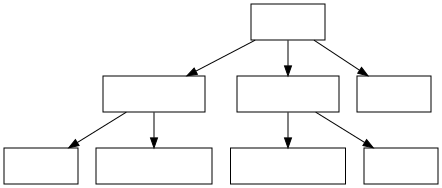

In [118]:
# 機械学習の分類
import graphviz
dot = graphviz.Digraph('ml', engine='dot')
dot.node('ml', '機械学習', shape='rectangle')
dot.node('sl', '教師あり学習', shape='rectangle')
dot.node('usl', '教師なし学習', shape='rectangle')
dot.node('rl', '強化学習', shape='rectangle')
dot.node('reg', '回帰問題', shape='rectangle')
dot.node('cls', 'クラス分類問題', shape='rectangle')
dot.node('clu', 'クラスタリング', shape='rectangle')
dot.node('dr', '次元削減', shape='rectangle')
dot.edge('ml', 'sl')
dot.edge('ml', 'usl')
dot.edge('ml', 'rl')
dot.edge('sl', 'reg')
dot.edge('sl', 'cls')
dot.edge('usl', 'clu')
dot.edge('usl', 'dr')
dot

## 用語
- 
- 
- 訓連セット、テストセット
- 特徴量
- ハイパーパラメータ
- クラス


## 機械学習のフロー
- 訓連セットとテストセットに分割する
- モデルを構築し、チューニングする
    - 訓連セットを訓連用データと検証用データに分割
    - 訓連用データで訓連したモデルを、検証用データで評価
    - 検証用データでの評価結果が良くなるように、モデルのハイパーパラメータを更新
- テストセットでモデルを評価

<img src="images/training-test.png" width="500"/>

### 注意点
- テストセットは最後のモデル評価以外では使ってはいけない
- テストセットを使ってハイパーパラメータチューニングするのは**絶対に**禁止
    - しりたいのは未見のデータに対する性能。テストセットは未見データの代用
    - テストセットに対してチューニングすると、未見ではなくなるので意味がない






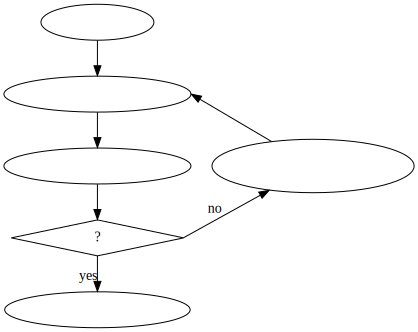

In [67]:
import graphviz

dot = graphviz.Digraph('training-flow', engine='neato')
dot.node('mc', 'モデル作成', pos="0,8!")
dot.node('tr', '訓連用データで訓連', pos="0,7!")
dot.node('hpt', 'ハイパーパラメータ\nチューニング', pos="3,6!")
dot.node('val', '検証用データで評価', pos="0,6!")
dot.node('div', '十分よいか?', shape='diamond', pos="0,5!")
dot.node('test', 'テストセットで評価', pos= "0,4!")
dot.edge('mc', 'tr')
dot.edge('tr', 'val')
dot.edge('hpt', 'test', style='invis')
dot.edge('val', 'div')
dot.edge('div:e', 'hpt', label='no')
dot.edge('hpt', 'tr:e', minlen = '1')
dot.edge('div', 'test', label='yes')
dot



## データの前処理
- 特徴量によって値のレンジが大きく異る場合
    - 特徴量A が0-1、特徴量Bが0-100 の値を取るようなケース
- そのまま扱うと値のレンジの大きい特徴量が支配的になり、レンジの小さい特徴量が十分に反映されない
- レンジがだいたい同じになるようにスケール変換する必要がある

## 注意点
- スケール変換が必要ないアルゴリズムもある
    - 決定木ベースの手法
    - 適当な値で各特徴量空間を分割していくだけなので、レンジが異なっても全く影響を受けない
- スケール変換は分割後の訓連データに対して学習を行い、同じ変換手法を用いてテスト/検証データを変換する
    - スケール変換はある種の教師なし学習

## いくつかの前処理手法
- MinMaxScalar - 最大値を1、最小値を0になるように変換
- StandardScalar - 平均0、分散1になるように変換
- RobustScalar - 中央値と四分位数を用いて変換。外れ値を無視する
- Normalizer - 原点からの方向だけを維持して、超球面上に投射


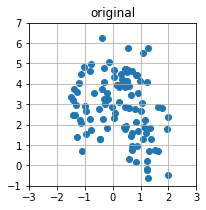

In [114]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
import matplotlib.pyplot as plt
import numpy as np
def plot(ax, x, label):
    ax.scatter(x[:,0], x[:,1])
    ax.set_title(label)
    ax.set_xticks(range(-3, 4))
    ax.set_yticks(range(-1, 8))
    ax.grid()
X, _ = make_blobs(random_state=0)
X *= np.array([0.5,1.0])
_, ax = plt.subplots(1,1, figsize=(3,3))
plot(ax, X, "original")

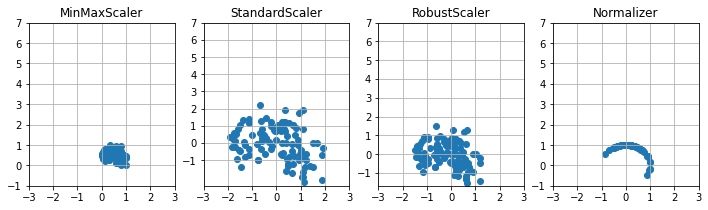

In [115]:
trans = [MinMaxScaler(), StandardScaler(), RobustScaler(), Normalizer()]
_, axes = plt.subplots(1, 4, figsize=(12,3))
for i, t in enumerate(trans):
    X_ = t.fit_transform(X)
    plot(axes[i], X_, t.__class__.__name__);